<a href="https://colab.research.google.com/github/brito-bernardo/osmnx/blob/main/CycleWays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 3.2 MB/s eta 0:00:00


In [2]:
import osmnx as ox
import matplotlib.pyplot as plt


In [3]:
# Configure Osmnx
ox.config(use_cache=True, log_console=True)


<ipython-input-3-574c4a144a2b>:2: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(use_cache=True, log_console=True)


In [4]:
place_name = "Porto, Portugal"

G = ox.graph_from_place(place_name, network_type='all')

In [21]:
# Convert the graph to GeoDataFrames, edges only since we don't need nodes
nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)

In [24]:
def is_bike_friendly(edge):
    # Checks for bike-friendly infrastructure or allowances
    return (
        edge.get('bicycle', 'no') in ('yes', 'designated', 'permissive') or
        edge.get('highway') == 'cycleway' or
        'cycleway' in edge
    )

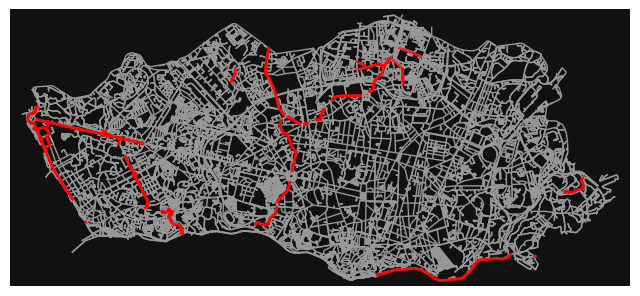

In [26]:
bike_friendly_edges = edges[edges.apply(is_bike_friendly, axis=1)]

# Check if there are any bike friendly edges found
if bike_friendly_edges.empty:
    raise ValueError("No bike-friendly paths found. The data might not include them or the filtering criteria might be too strict.")

# Plot all streets
fig, ax = ox.plot_graph(G, show=False, close=False, edge_color="#999999", node_size=0)

# Plot bike-friendly streets
for _, edge in bike_friendly_edges.iterrows():
    line = edge['geometry']
    x, y = line.xy
    ax.plot(x, y, color='red', linewidth=2, alpha=0.7)

plt.show()